In [9]:
import torch
import random
import numpy as np
import torchvision.datasets
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [13]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [23]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\Programs\anaconda\envs\ml\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Programs\anaconda\envs\ml\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\Programs\anaconda\envs\ml\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Programs\anaconda\envs\ml\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [24]:
X_train = X_train.float()
X_test = X_test.float()

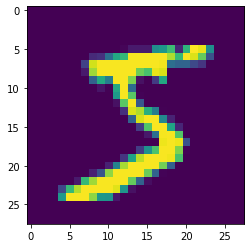

tensor(5)


In [25]:
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [26]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [27]:
class MNISTNet(torch.nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 100)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(100, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet()

In [29]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=0.001)

In [30]:
batch_size = 100
for epoch in range(10):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    print(accuracy)

tensor(0.9092)
tensor(0.9162)
tensor(0.9207)
tensor(0.9292)
tensor(0.9274)
tensor(0.9291)
tensor(0.9274)
tensor(0.9338)
tensor(0.9237)
tensor(0.9219)


In [61]:
torch.argmax(mnist_net.forward(X_test)[0]).item()

7

In [62]:
def get_preds(input_, net):
    predictions = net.forward(input_)
    res = []
    for p in predictions:
        res.append(torch.argmax(p).item())
    return np.array(res)

In [63]:
get_preds(X_test, mnist_net)

array([7, 2, 1, ..., 4, 5, 6])

In [68]:
y_test.detach().numpy()

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

D:\Programs\anaconda\envs\ml\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


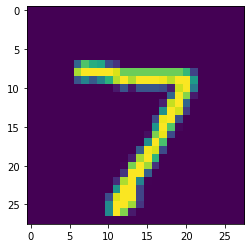

tensor(7)


In [64]:
plt.imshow(MNIST_test.test_data.float()[0, :, :])
plt.show()
print(y_test[0])

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(get_preds(X_test, mnist_net), y_test.detach().numpy()))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1036
           1       0.98      0.97      0.98      1142
           2       0.87      0.92      0.90       977
           3       0.87      0.90      0.89       977
           4       0.92      0.95      0.93       945
           5       0.90      0.87      0.88       923
           6       0.94      0.96      0.95       937
           7       0.93      0.94      0.94      1026
           8       0.90      0.86      0.88      1017
           9       0.92      0.91      0.91      1020

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [93]:
np.array(confusion_matrix(get_preds(X_test, mnist_net), y_test.detach().numpy()))

array([[ 963,    0,   12,    6,    3,   12,   21,    1,   11,    7],
       [   0, 1111,    6,    0,    4,    1,    3,    8,    2,    7],
       [   2,    3,  900,   19,    9,    2,    3,   28,    9,    2],
       [   1,    4,   33,  882,    0,   31,    1,    5,    9,   11],
       [   0,    1,    5,    0,  899,    4,    6,    5,    7,   18],
       [   8,    2,    2,   52,    1,  802,   16,    1,   28,   11],
       [   2,    3,    8,    0,    8,    8,  900,    0,    7,    1],
       [   1,    1,   14,   20,    4,    4,    0,  961,    9,   12],
       [   3,   10,   49,   27,    8,   22,    8,    5,  873,   12],
       [   0,    0,    3,    4,   46,    6,    0,   14,   19,  928]],
      dtype=int64)

In [99]:
np.argmax(np.array(confusion_matrix(get_preds(X_test, mnist_net), y_test.detach().numpy())).sum(axis=0) - \
    np.array(confusion_matrix(get_preds(X_test, mnist_net), y_test.detach().numpy())).max(axis=0))

2